# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lon"]
        city_lng = city_weather["coord"]["lat"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["sys"]["sunrise"]

        # # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dudinka
Processing Record 2 of Set 1 | mount pearl
Processing Record 3 of Set 1 | xifeng
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | skiathos
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | mugia
Processing Record 10 of Set 1 | tolanaro
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | tazovsky
Processing Record 13 of Set 1 | rumonge
Processing Record 14 of Set 1 | asau village
City not found. Skipping...
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | hadibu
Processing Record 17 of Set 1 | remire-montjoly
Processing Record 18 of Set 1 | bac kan
Processing Record 19 of Set 1 | tralee
Processing Record 20 of Set 1 | illizi
Processing Record 21 of Set 1 | sihanoukville
Processing Record 22 of Set 1 | ust

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dudinka,86.1778,69.4058,289.05,60,78,0.50,RU,1691527554
1,mount pearl,-52.7813,47.5166,286.40,89,100,3.60,CA,1691482650
2,xifeng,124.7222,42.7372,294.63,85,95,2.48,CN,1691527214
3,albany,-73.9662,42.6001,293.90,82,82,0.45,US,1691488490
4,hawaiian paradise park,-154.9731,19.5933,300.87,75,100,2.06,US,1691510297


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,86.1778,69.4058,289.05,60,78,0.50,RU,1691527554
1,mount pearl,-52.7813,47.5166,286.40,89,100,3.60,CA,1691482650
2,xifeng,124.7222,42.7372,294.63,85,95,2.48,CN,1691527214
3,albany,-73.9662,42.6001,293.90,82,82,0.45,US,1691488490
4,hawaiian paradise park,-154.9731,19.5933,300.87,75,100,2.06,US,1691510297


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

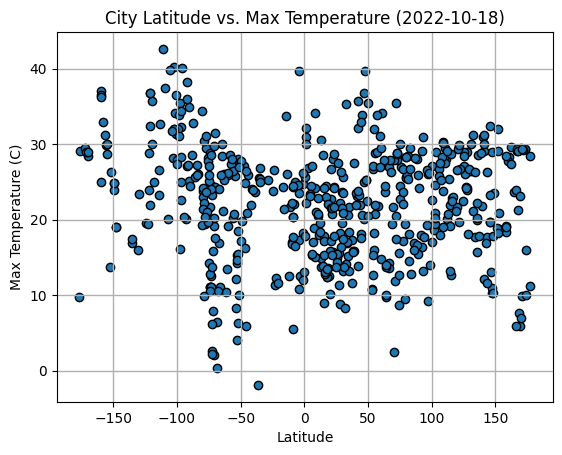

In [18]:
# Build scatter plot for latitude vs. temperature
x_data = city_data_df["Lat"]
y_data = city_data_df["Max Temp"] - 272.15
plt.scatter(x_data, y_data, edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.grid(linestyle='-', linewidth=1)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

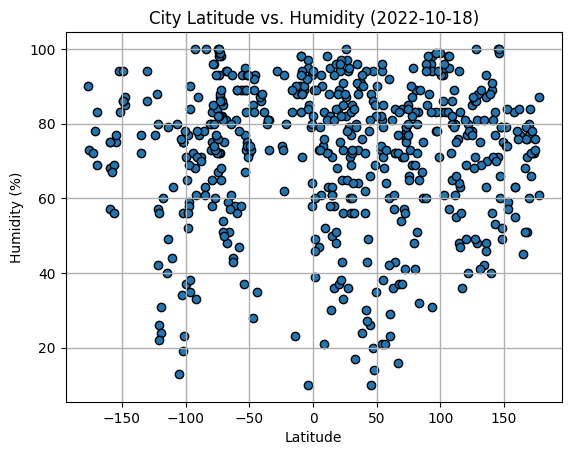

In [21]:
# Build the scatter plots for latitude vs. humidity
x_data = city_data_df["Lat"]
y_data = city_data_df["Humidity"]
plt.scatter(x_data, y_data, edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid(linestyle='-', linewidth=1)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

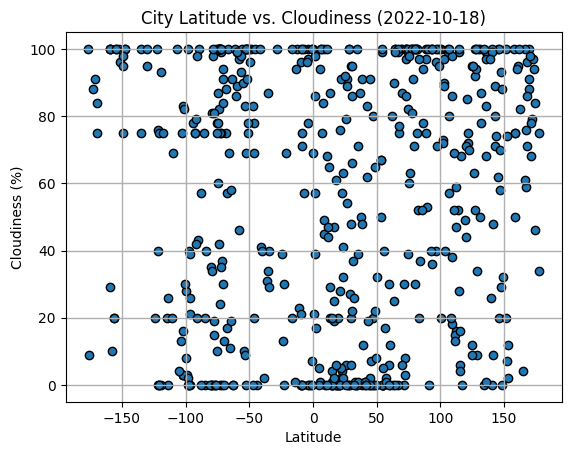

In [23]:
# Build the scatter plots for latitude vs. cloudiness
x_data = city_data_df["Lat"]
y_data = city_data_df["Cloudiness"]
plt.scatter(x_data, y_data, edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid(linestyle='-', linewidth=1)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

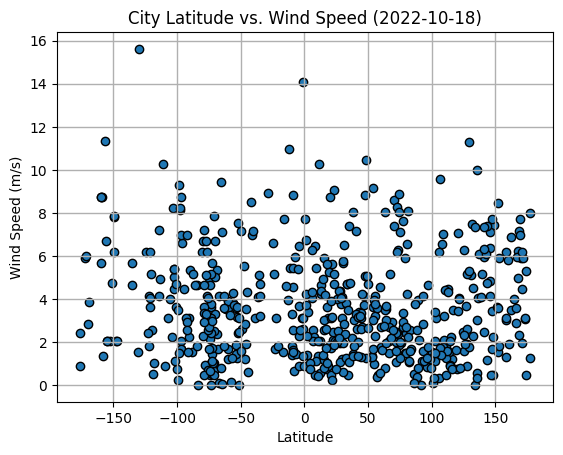

In [25]:
# Build the scatter plots for latitude vs. wind speed
x_data = city_data_df["Lat"]
y_data = city_data_df["Wind Speed"]
plt.scatter(x_data, y_data, edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid(linestyle='-', linewidth=1)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#  def calculate_regression_plots():
#   print("Hello from a function") 

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,86.1778,69.4058,289.05,60,78,0.50,RU,1691527554
2,xifeng,124.7222,42.7372,294.63,85,95,2.48,CN,1691527214
5,blackmans bay,147.3167,-43.0167,282.44,79,29,3.45,AU,1691529229
6,skiathos,23.4909,39.1623,296.47,56,1,9.08,GR,1691551991
9,tolanaro,46.9987,-25.0319,292.19,94,20,4.12,MG,1691551471


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mount pearl,-52.7813,47.5166,286.40,89,100,3.60,CA,1691482650
3,albany,-73.9662,42.6001,293.90,82,82,0.45,US,1691488490
4,hawaiian paradise park,-154.9731,19.5933,300.87,75,100,2.06,US,1691510297
7,bethel,-73.4140,41.3712,296.75,72,0,3.60,US,1691488524
8,mugia,-9.2179,43.1041,292.54,83,0,4.53,ES,1691559333


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.11425856687272877


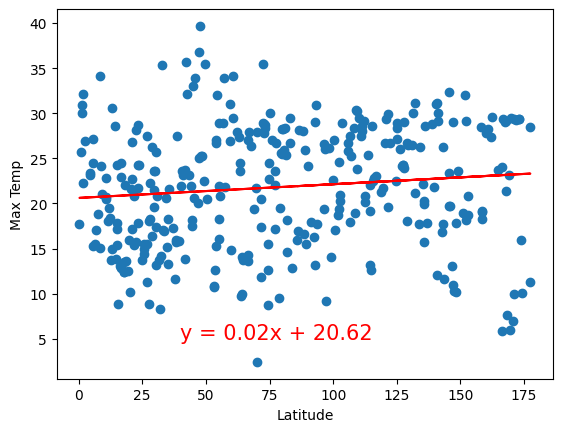

In [48]:
# Linear regression on Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Max Temp"] - 272.15

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print("The r-value is: " + str(rvalue))

plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, "r-")
plt.annotate(line_eq, (40, 5), fontsize=15, color="red")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

# Show plot
plt.show()


The r-value is: -0.34713496191614307


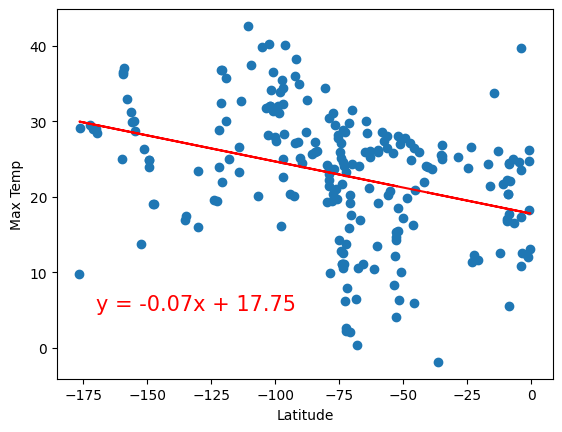

In [47]:
# Linear regression on Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Max Temp"] - 272.15

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print("The r-value is: " + str(rvalue))

plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, "r-")
plt.annotate(line_eq, (-170, 5), fontsize=15, color="red")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

# Show plot
plt.show()


**Discussion about the linear relationship:** 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06976844551893398


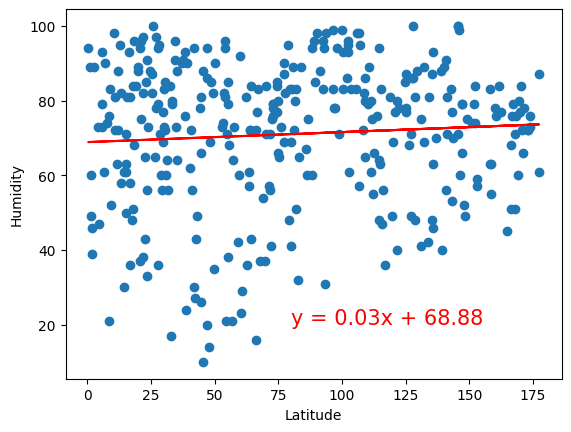

In [52]:
# Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print("The r-value is: " + str(rvalue))

plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, "r-")
plt.annotate(line_eq, (80, 20), fontsize=15, color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Show plot
plt.show()

The r-value is: 0.21293513178307089


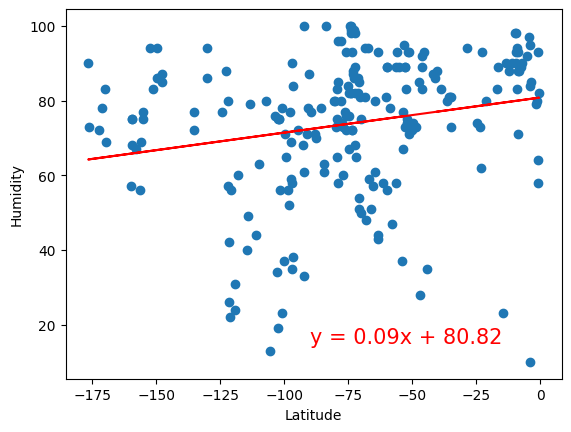

In [59]:
# Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print("The r-value is: " + str(rvalue))

plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, "r-")
plt.annotate(line_eq, (-90, 15), fontsize=15, color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3285963159583474


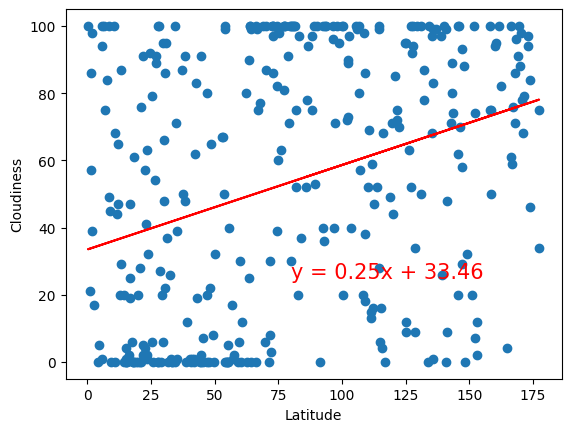

In [61]:
# Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print("The r-value is: " + str(rvalue))

plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, "r-")
plt.annotate(line_eq, (80, 25), fontsize=15, color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Show plot
plt.show()

The r-value is: -0.04967215765993847


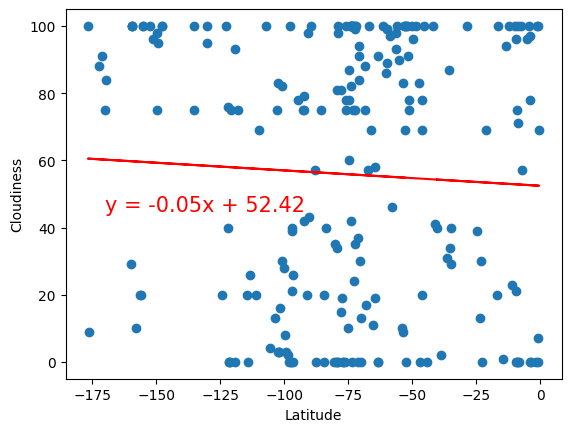

In [63]:
# Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print("The r-value is: " + str(rvalue))

plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, "r-")
plt.annotate(line_eq, (-170, 45), fontsize=15, color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.12201291367057387


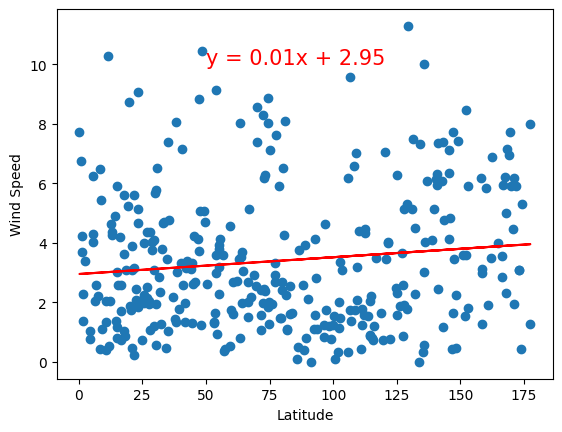

In [65]:
# Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print("The r-value is: " + str(rvalue))

plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, "r-")
plt.annotate(line_eq, (50, 10), fontsize=15, color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Show plot
plt.show()

The r-value is: -0.1230695334335841


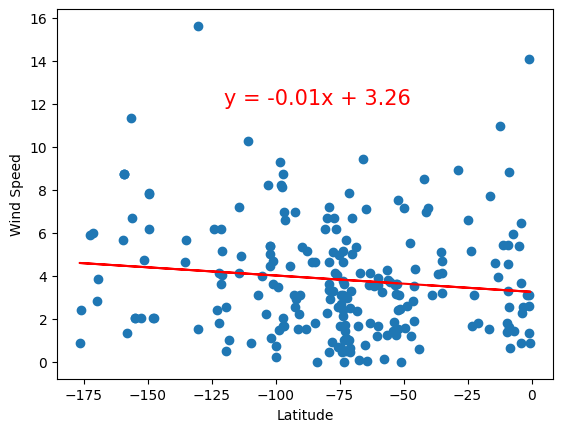

In [68]:
# Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print("The r-value is: " + str(rvalue))

plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, "r-")
plt.annotate(line_eq, (-120, 12), fontsize=15, color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE